# In this notebook we will be predicting which customers are likely to churn('leave') so that Telecom can intervene.

##### The dataset used in this notebook is available at https://www.kaggle.com/datasets/blastchar/telco-customer-churn

##### 1."Which of our existing customers are at high risk of leaving (churning) within the next period, and what targeted actions can we take to retain them most cost-effectively?” this is the question we are trying to answer.

###### -This is due to the fact that acquiring a new customer can cost 3–5× more than retaining an existing one and Even a small drop in churn rate can translate to millions in retained revenue.

##### *we will start by importing the required libraries for execution

###### importing libraries

In [1]:
# for Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

# Display plots in notebook
%matplotlib inline


In [2]:
#loading the dataset
file_path = r'C:\Users\tladi\Desktop\CUSTOMERCHURN.csv'

In [3]:
df = pd.read_csv(r'C:\Users\tladi\Desktop\CUSTOMERCHURN.csv')

In [4]:
#checking if the dataset has been loaded succesfully
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#understanding the dataset better, check how many columns it has and which ones might be missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#from the above info we can see that there are no missing values as all columns have the equal entries,but just to confirm we check missing values.
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

In [8]:
#our dataset does not have duplicates,now we check descriptive statistics of the dataset
df.describe()
df.describe(include ='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


<Axes: xlabel='Churn', ylabel='count'>

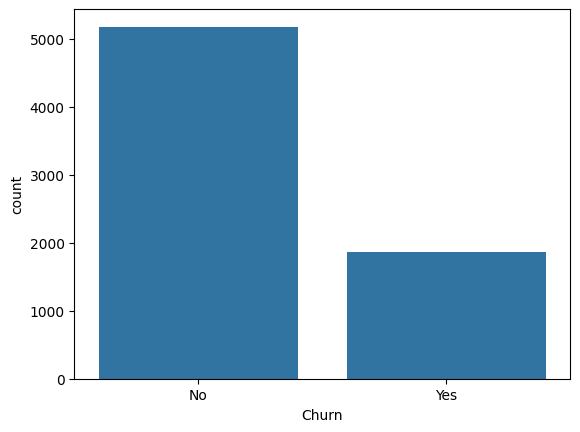

In [9]:
# checking target variable 
df['Churn'].value_counts(normalize=True) #checking class balance
sns.countplot(x='Churn', data=df)

the above plot clearly shows that most customers did not churn('leave')

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

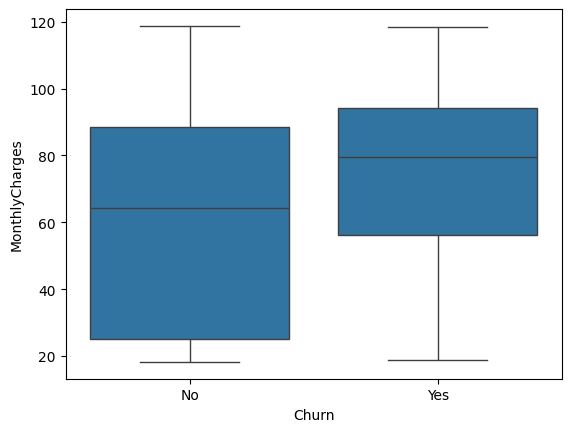

In [10]:
#now lets try and understand how these other features within the dataset relate to our target variable 'Churn'.
#we will start with numerical features,for numerical features we will use boxplots or histograms for visualizations.
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)


for Total Charges we will use a histogram to visualize the relationship

##### now lets see how 'Total charges' affect customer  'churn',but first we have to correct the data type for this column since 'Total charges' cant be object, but either int or float.

In [11]:
#check incorrect/problematic entries within the column 
print(df['TotalCharges'].unique()[:10])

#convert the column to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.strip(), errors='coerce')

#replace missing values with zero 
df.fillna({'TotalCharges': 0}, inplace=True)

#convert to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

#verify if the convesion was a success
print(df['TotalCharges'].dtype)



['29.85' '1889.5' '108.15' '1840.75' '151.65' '820.5' '1949.4' '301.9'
 '3046.05' '3487.95']
float64


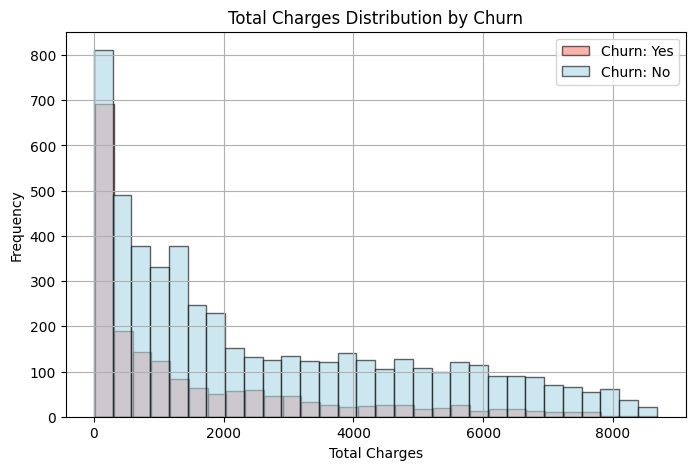

In [12]:
#now we can plot a histogram of 'TotalCharges' distributions by 'Churn'
# we start by spliting the data
churn_yes = df[df['Churn'] == 'Yes']['TotalCharges']
churn_no = df[df['Churn'] == 'No']['TotalCharges']

# Plot
plt.figure(figsize=(8, 5))
plt.hist(churn_yes, bins=30, alpha=0.6, label='Churn: Yes', color='salmon', edgecolor='black')
plt.hist(churn_no, bins=30, alpha=0.6, label='Churn: No', color='lightblue', edgecolor='black')

plt.title('Total Charges Distribution by Churn')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

#####  for visualizing numeric features thats about it ,remaining columns(eg..customer id,tenure and senior citizens wont really help us in answering the question,The company cannot really change any of those)

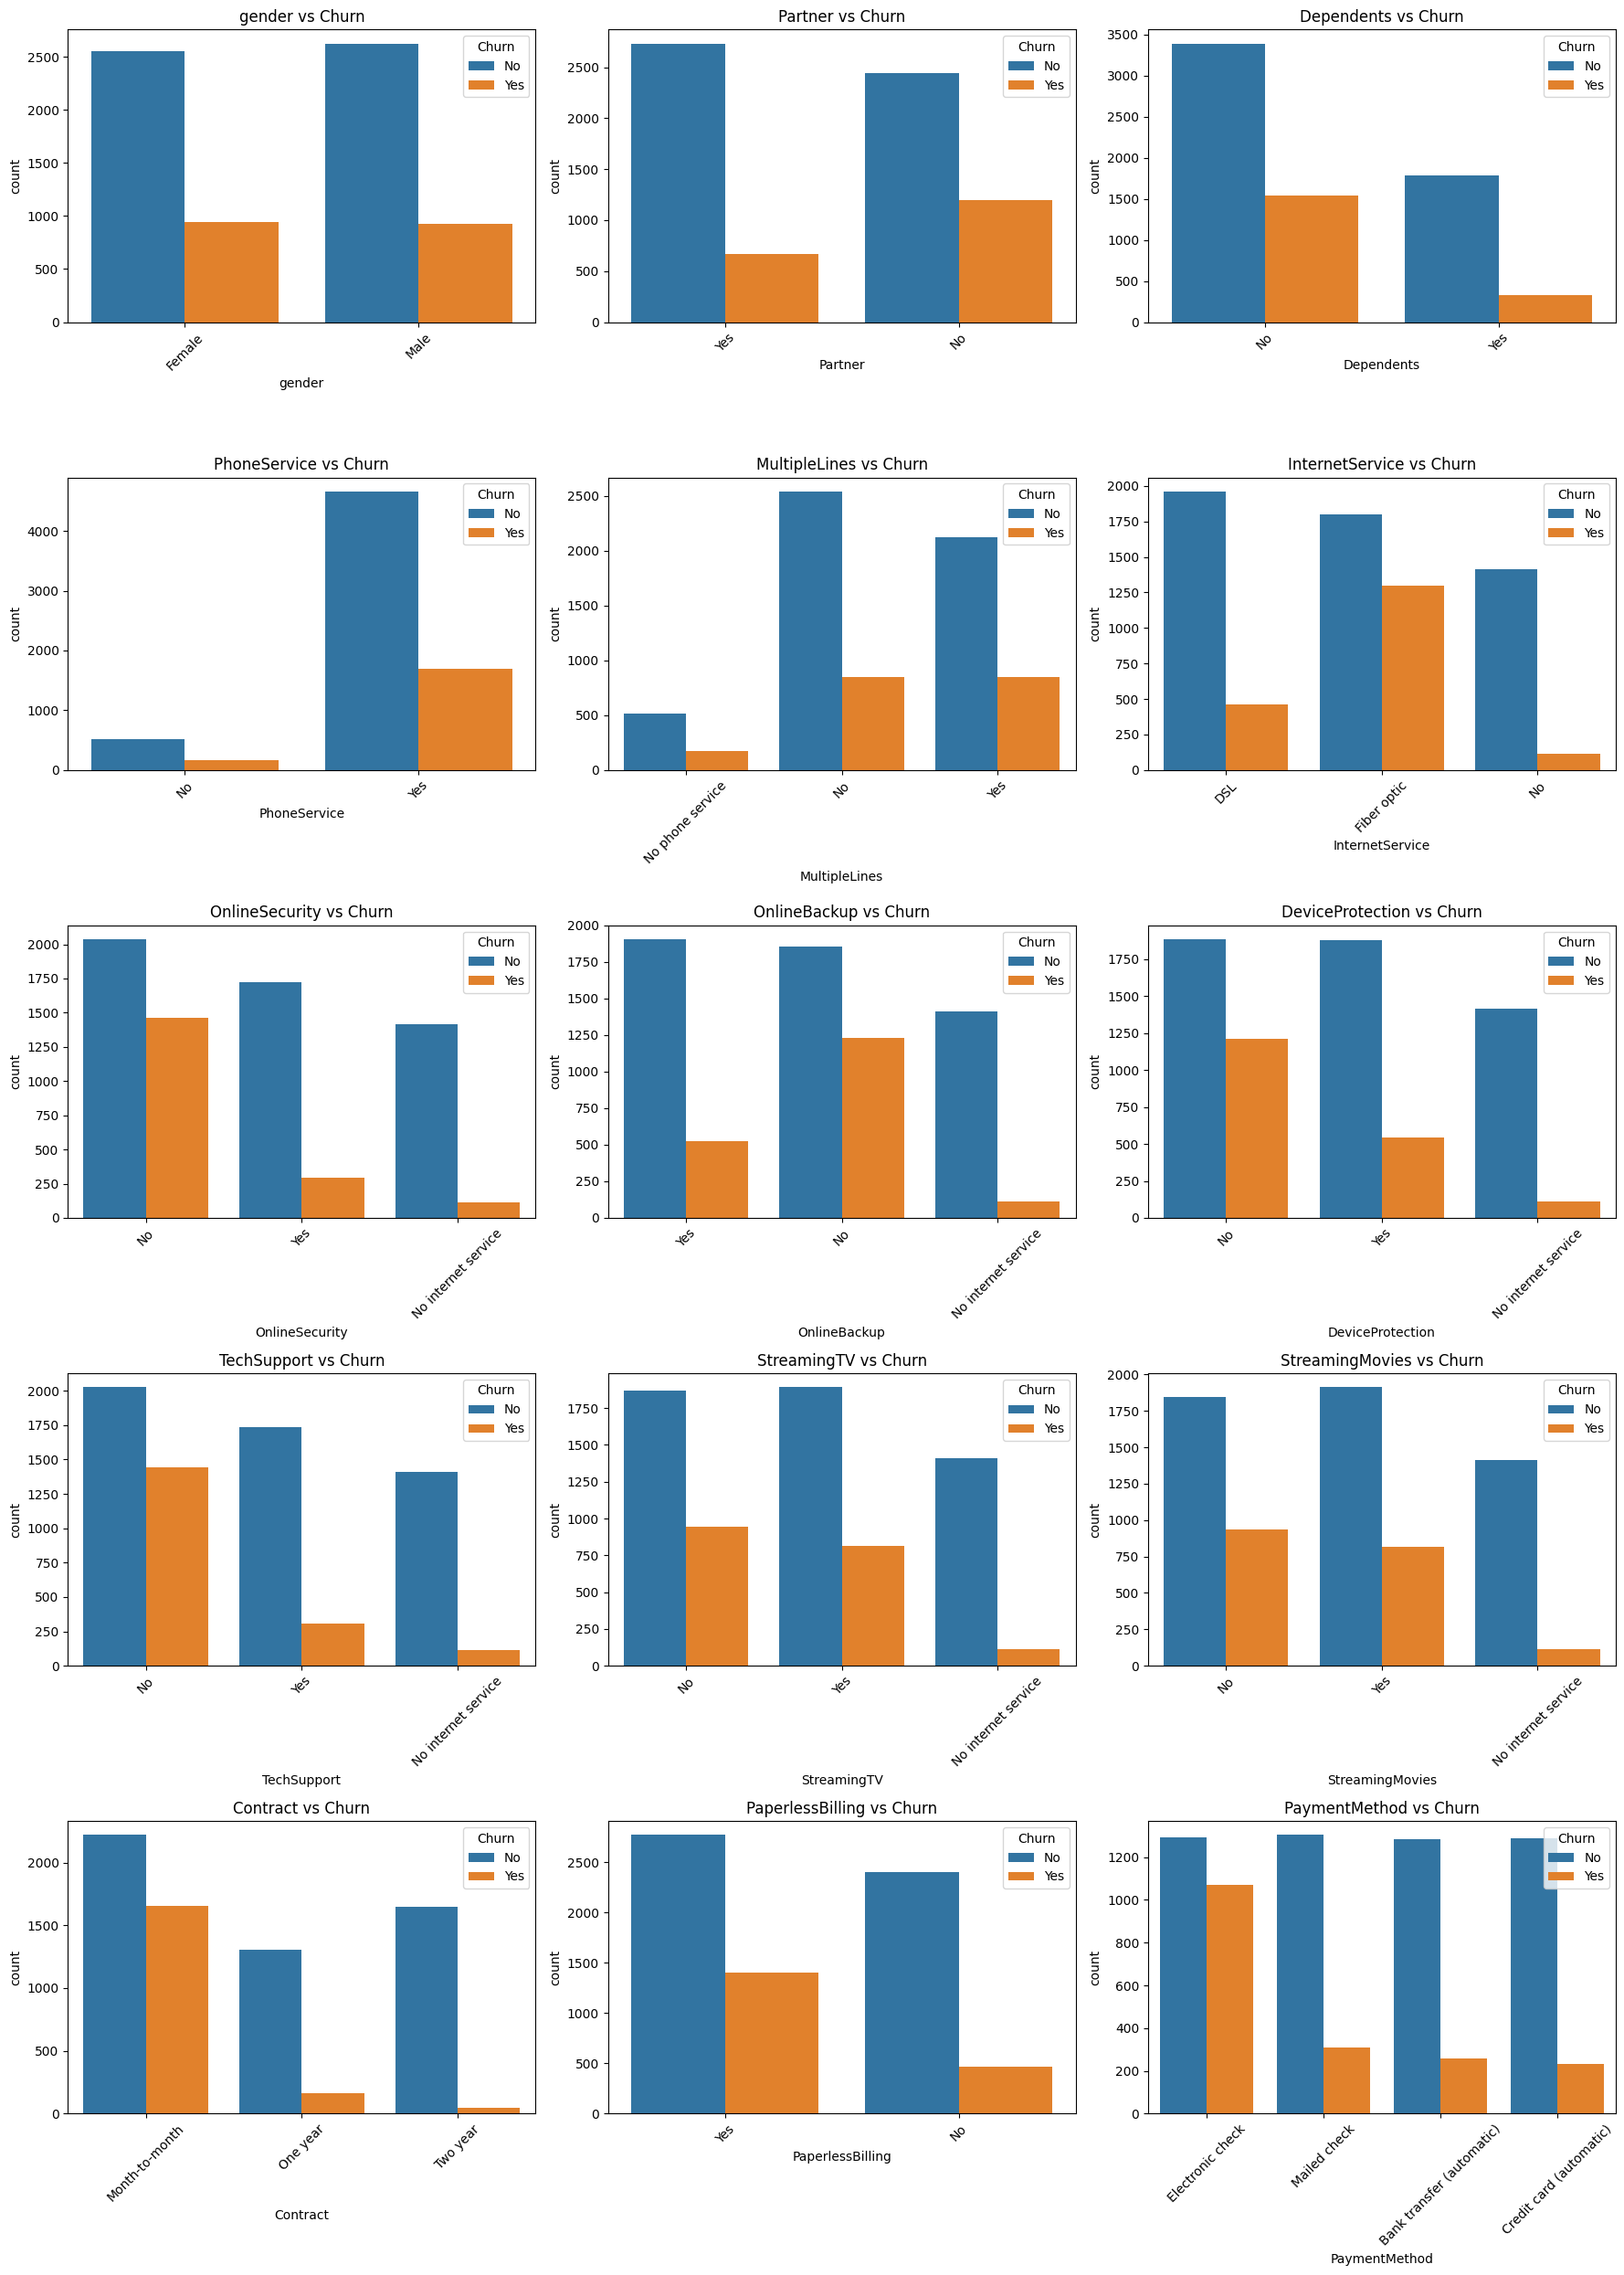

In [13]:
#now we move to vizualizing categorical feartures ,we want to see which fearture contribute the most or has much effect on Customer churn.
#lets drop cusomer id col
df.drop('customerID', axis=1, inplace=True)
# Get all categorical columns except 'Churn'
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Churn')

# Set up subplots
n_cols = 3
n_rows = -(-len(categorical_cols) // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# Plot each categorical feature vs. churn
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i])
    axes[i].set_title(f'{col} vs Churn')
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [14]:
#now we need to encode these categorical features for our Model
encoded_features = pd.get_dummies(df, drop_first=True)

In [15]:
X = encoded_features.drop('Churn_Yes', axis=1)
y = encoded_features['Churn_Yes']

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
encoded_features[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(
    encoded_features[['tenure', 'MonthlyCharges', 'TotalCharges']]
)


In [17]:
#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state=42, stratify=y)

In [18]:
#train a model
Lr = LogisticRegression(class_weight = 'balanced', max_iter=1000)
Lr.fit(X_train, y_train)

C:\Users\tladi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000)

In [19]:
y_pred = Lr.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.90      0.72      0.80      1035
        True       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [20]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm_1 = confusion_matrix(y_test, y_pred)

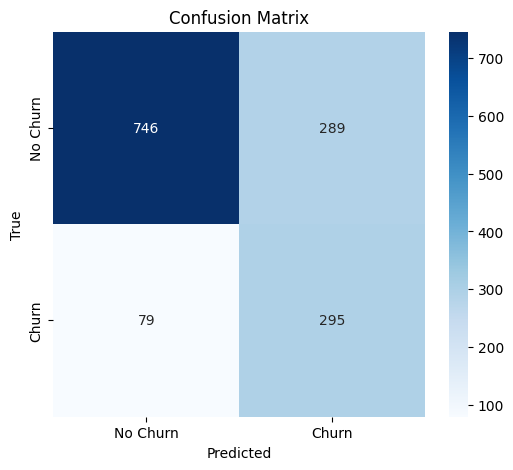

In [21]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [22]:
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier(class_weight = 'balanced',random_state=42)
Dt.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [23]:
y_pred = Dt.predict(X_test)
cm_2 = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.81      0.82      0.82      1035
        True       0.49      0.48      0.49       374

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409



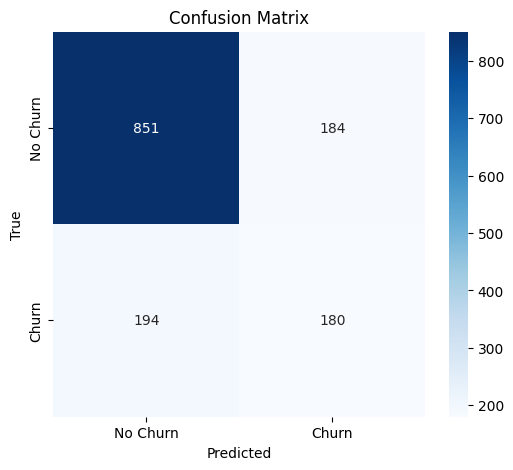

In [24]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier(class_weight = 'balanced', random_state=42)
Rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [26]:
y_pred = Rf.predict(X_test)
cm_3 = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.83      0.90      0.86      1035
        True       0.64      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



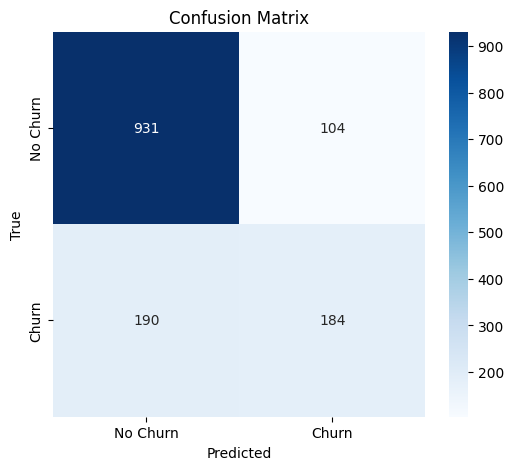

In [27]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm_3, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [28]:
#no we want to compare the three models side by side
from sklearn.metrics import roc_curve, roc_auc_score

# 
y_proba_Lr = Lr.predict_proba(X_test)[:, 1]
y_proba_Dt = Dt.predict_proba(X_test)[:, 1]
y_proba_Rf = Rf.predict_proba(X_test)[:, 1]

#COMPUTE
fpr_Lr, tpr_Lr, _ = roc_curve(y_test, y_proba_Lr)
fpr_Dt, tpr_Dt, _ = roc_curve(y_test, y_proba_Dt)
fpr_Rf, tpr_Rf, _ = roc_curve(y_test, y_proba_Rf)

auc_Lr = roc_auc_score(y_test, y_proba_Lr)
auc_Dt = roc_auc_score(y_test, y_proba_Dt)
auc_Rf = roc_auc_score(y_test, y_proba_Rf)


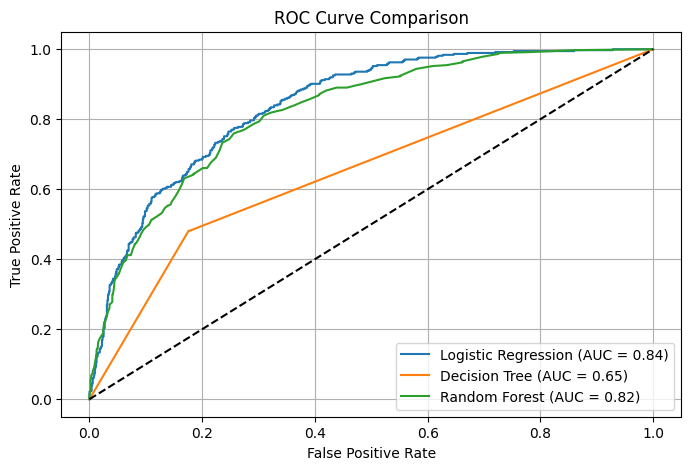

In [29]:
#PLOTTING THE CURVES
plt.figure(figsize=(8, 5))

plt.plot(fpr_Lr, tpr_Lr, label=f'Logistic Regression (AUC = {auc_Lr:.2f})')
plt.plot(fpr_Dt, tpr_Dt, label=f'Decision Tree (AUC = {auc_Dt:.2f})')
plt.plot(fpr_Rf, tpr_Rf, label=f'Random Forest (AUC = {auc_Rf:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [30]:
#LETS COMPARE THEIR CLASSIFICATION REPORTS
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    'Logistic Regression': Lr,
    'Decision Tree': Dt,
    'Random Forest': Rf
}

# Initialize list to store results
results = []

# Loop through each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # probability for class 1

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_proba)
    })

# Create DataFrame
results_df = pd.DataFrame(results)

# Display the table sorted by AUC
results_df = results_df.sort_values(by='AUC', ascending=False)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1-Score       AUC
0  Logistic Regression  0.738822   0.505137  0.788770  0.615866  0.842091
2        Random Forest  0.791341   0.638889  0.491979  0.555891  0.822450
1        Decision Tree  0.731725   0.494505  0.481283  0.487805  0.652218


In [31]:
#the best perfoming model of the three is Logistic Regression 

In [32]:
from sklearn.metrics import precision_recall_curve, f1_score, confusion_matrix, classification_report


# Step 1: Get predicted probabilities
y_proba = Lr.predict_proba(X_test)[:, 1]

# Step 2: Calculate precision, recall for various thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Step 3: Calculate F1 scores for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)

# Step 4: Find the threshold with the best F1 score
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best F1 Score: {f1_scores[best_idx]:.4f}")

# Step 5: Evaluate the model using this best threshold
y_pred_thresh = (y_proba >= best_threshold).astype(int)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_thresh))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_thresh))


Best Threshold: 0.54
Best F1 Score: 0.6251

Confusion Matrix:
[[780 255]
 [ 88 286]]

Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.75      0.82      1035
        True       0.53      0.76      0.63       374

    accuracy                           0.76      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409

